In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMRAW
import os

# pyMRAW functionality showcase

`pyMRAW` is an open-source package, enabling the efficient use of the Photron MRAW video files in Python workflows.

It's main feature is the use of memory-mapped ([`np.memmap`](https://numpy.org/doc/stable/reference/generated/numpy.memmap.html)) arrays to create memory maps to locally stored raw video files and avoid loading large amounts of data into RAM. 

**Warning**: to take advantage of pyMRAW's memory-mapping functionality, make sure to save MRAW files either in 8-bit or 16-bit formats, corresponding to standard data types `uint8` and `uint16`! Using pyMRAW to read 12-bit MRAW files is possible, but requires loading the complete image data into RAM to produce standard Numpy arrays.

## Working with MRAW files

MRAW files are stored along with `cihx` (or `cih` in legacy applications) metadata files. These contain vital information for interpretation of the binary image data. and must therefore be present alongside the MRAW files.

To load `.mraw` - `.cihx` files, use the `pymraw.load_video` function (if the video was cut from its original size during saving, a warning will be shown on first load, and can be safely ignored):

In [2]:
images, info = pyMRAW.load_video('data/beam.cihx')

d:\workspace\_PY_PACKAGES\pymraw\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 4, Original total frame: 400)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


In case of 16-bit image data, the `video` object is a memory-mapped array of the `uint16` data type and shape `(N_images, height, width)`:

In [3]:
type(images), images.dtype, images.shape

(numpy.memmap, dtype('uint16'), (4, 80, 1024))

The `info` object is a dictionary of metadata, read from the `cihx` file, which can also be easily viewed in Python:

In [4]:
info

{'Date': '2017/7/13',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Record Rate(fps)': 50000.0,
 'Shutter Speed(s)': 200000.0,
 'Total Frame': 4,
 'Original Total Frame': 400,
 'Image Width': 1024,
 'Image Height': 80,
 'File Format': 'Mraw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Lower',
 'Color Bit': 16,
 'Comment Text': None}

The images, contained in the `video` memory-mapped array, can be used in the same way as normal Numpy array objects.They will be accepted as input into any workflows where a Numpy array would be accepted.

In [5]:
first_image = images[0]
type(first_image), first_image.dtype, first_image.shape

(numpy.memmap, dtype('uint16'), (80, 1024))

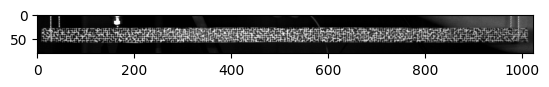

In [7]:
plt.figure()
plt.imshow(first_image, cmap='gray')
plt.show()

Some caution is advised when processing the `memmap` arrays to avoid operations that would convert the data into conventional Numpy arrays, loading it into RAM. Especially when using non-Numpy methods, make sure that the output of your processing workflow is still a memory-mapped array before committing to processing large quantities of data.

## Saving MRAW videos

`pyMRAW` also includes the basic functionality of saving your custom image data into the MRAW format using the `pyMRAW.save_mraw()` method:

In [29]:
random_images = np.random.randint(low=0, high=255, size=(10, 64, 64), dtype=int)
info_dict = {'Record Rate(fps)': 25,
            'Total Frame': random_images.shape[0],
            'Image Width': random_images.shape[2],
            'Image Height': random_images.shape[1],
            'Color Type': 'Mono', 
            'Color Bit': 8,
            'Comment Text': 'Randomly generated images.',
            }

os.makedirs('temp', exist_ok=True)
mraw_file, cih_file = pyMRAW.save_mraw(random_images, 'temp/random.mraw', info_dict=info_dict)

 The expected image format is an appropriately shaped, `(N_images, height, width)`, integer Numpy array.

 The `info_dict` argument is a dictionary of metadata you wish to assign to your video. Default values for key metadata entries, required to view the MRAW video using Photron's PFV software, are used if they are not provided via `info_dict`.